In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
%matplotlib inline
import seaborn as sns
import sklearn

from sklearn.cross_validation import train_test_split

/Users/rose/anaconda3/envs/wns/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_set = pd.read_csv("data/train_LZdllcl.csv")

In [3]:
train_set.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train_set.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
test_set = pd.read_csv("data/test_2umaH9m.csv")

In [7]:
test_set.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


##### Data preporcessing and visualisation

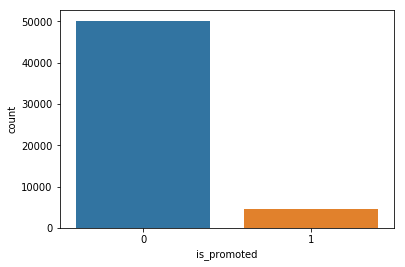

In [8]:
sns.countplot(train_set['is_promoted'])

There is a very low percentage of people promoted in the company.

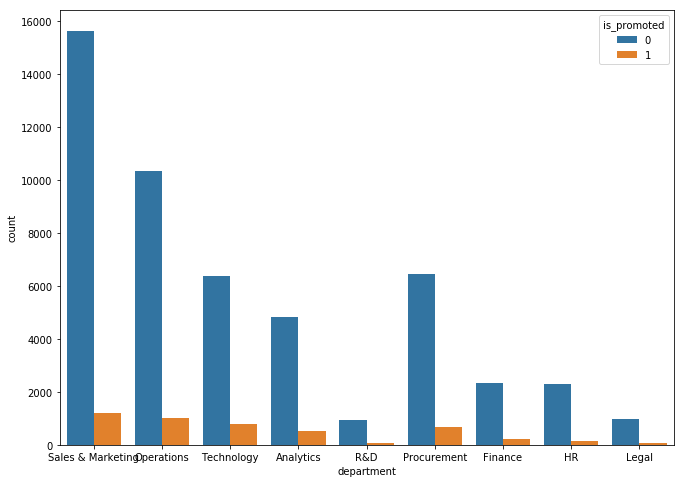

In [9]:
plt.figure(figsize=(11,8))
sns.countplot(train_set["department"], hue=train_set["is_promoted"])

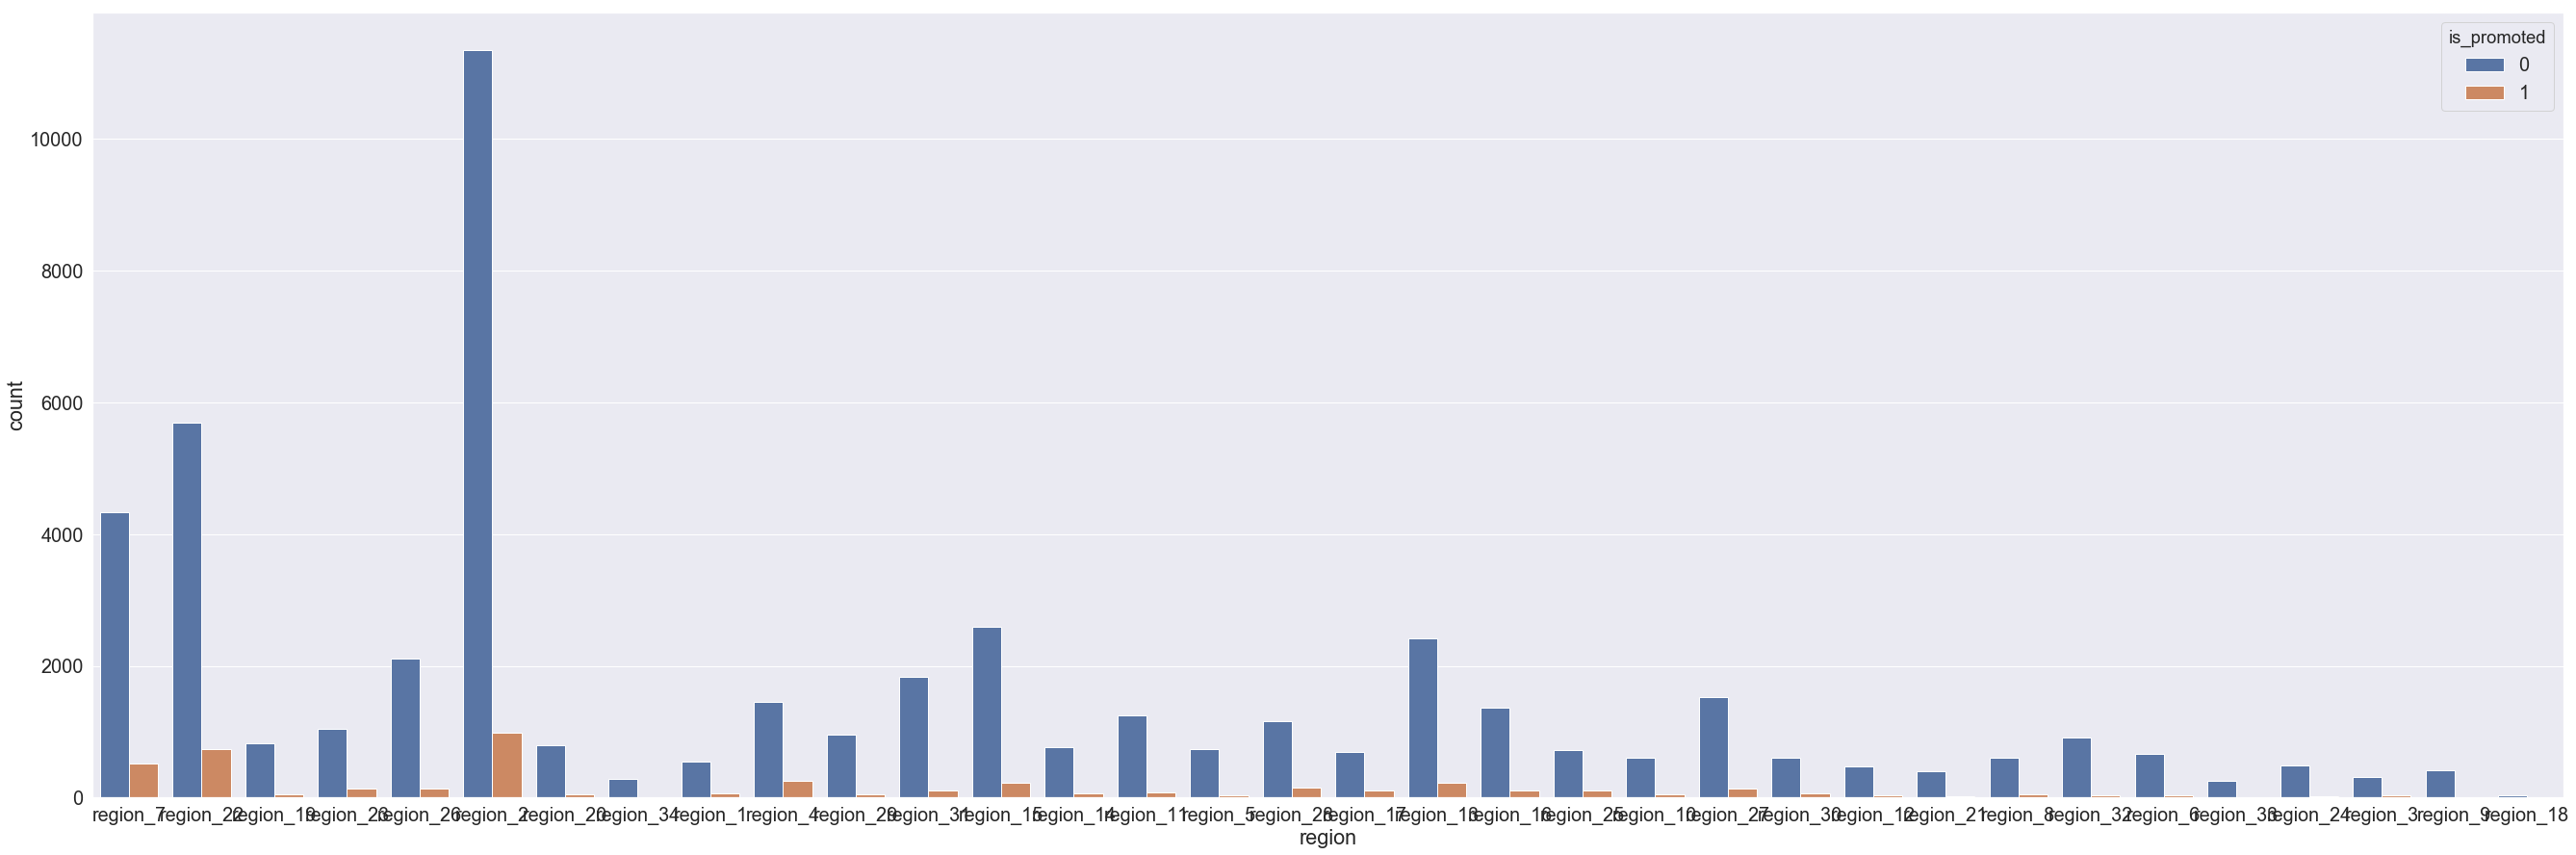

In [10]:
plt.figure(figsize=(46,15))
sns.set(font_scale=1.8)
sns.countplot(train_set["region"], hue=train_set["is_promoted"])

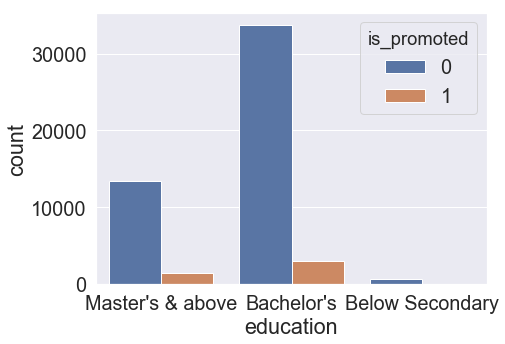

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(train_set["education"], hue=train_set["is_promoted"])

People with a bachelors education got promoted more

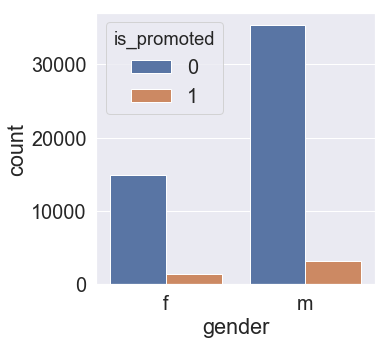

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(train_set["gender"], hue=train_set["is_promoted"])

Promotion is not based on gender since if we look at the percentage promoted based on the total number of each gender

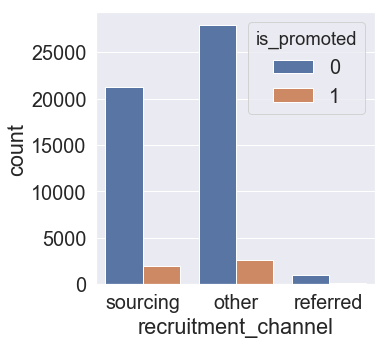

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(train_set["recruitment_channel"], hue=train_set["is_promoted"])

Reffered recruting channel seems to have the least promotion.

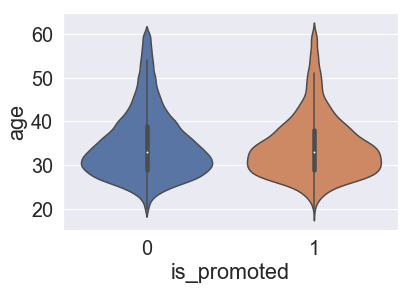

In [14]:
sns.violinplot(x='is_promoted', y='age', data=train_set)

From the representation above age is not a main factor of getting a promotion, you basicaaly need to have other skils.

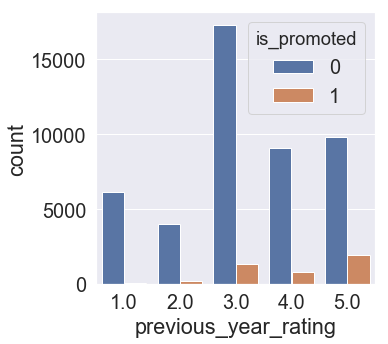

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(train_set["previous_year_rating"], hue=train_set["is_promoted"])

People with rating of 3 and abpve had a high chance of being promoted

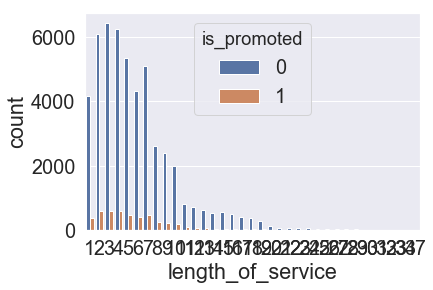

In [16]:
sns.countplot(train_set["length_of_service"], hue=train_set["is_promoted"])

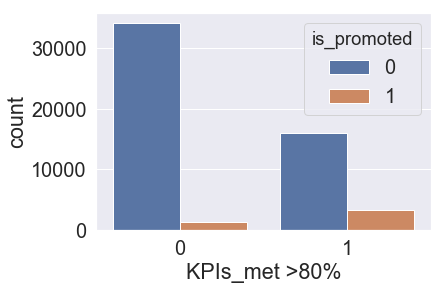

In [17]:
sns.countplot(train_set["KPIs_met >80%"], hue=train_set["is_promoted"])

In [18]:
train_set = train_set.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# department
train_set["department"] = le.fit_transform(train_set["department"])

# education
train_set["education"] = le.fit_transform(train_set["education"])

# recruitment_channel
train_set["recruitment_channel"] = le.fit_transform(train_set["recruitment_channel"])
# region
train_set["region"] = le.fit_transform(train_set["region"])


In [20]:
train_set = train_set.drop(["gender", "age"], axis=1)

In [21]:
def plot_correlation(train_df, size=30):
    correlation = train_df.corr()
    figure, ax = plt.subplots(figsize=(size, size))
    ax.matshow(correlation)
    plt.xticks(range(len(correlation.columns)), correlation.columns)
    plt.yticks(range(len(correlation.columns)), correlation.columns)

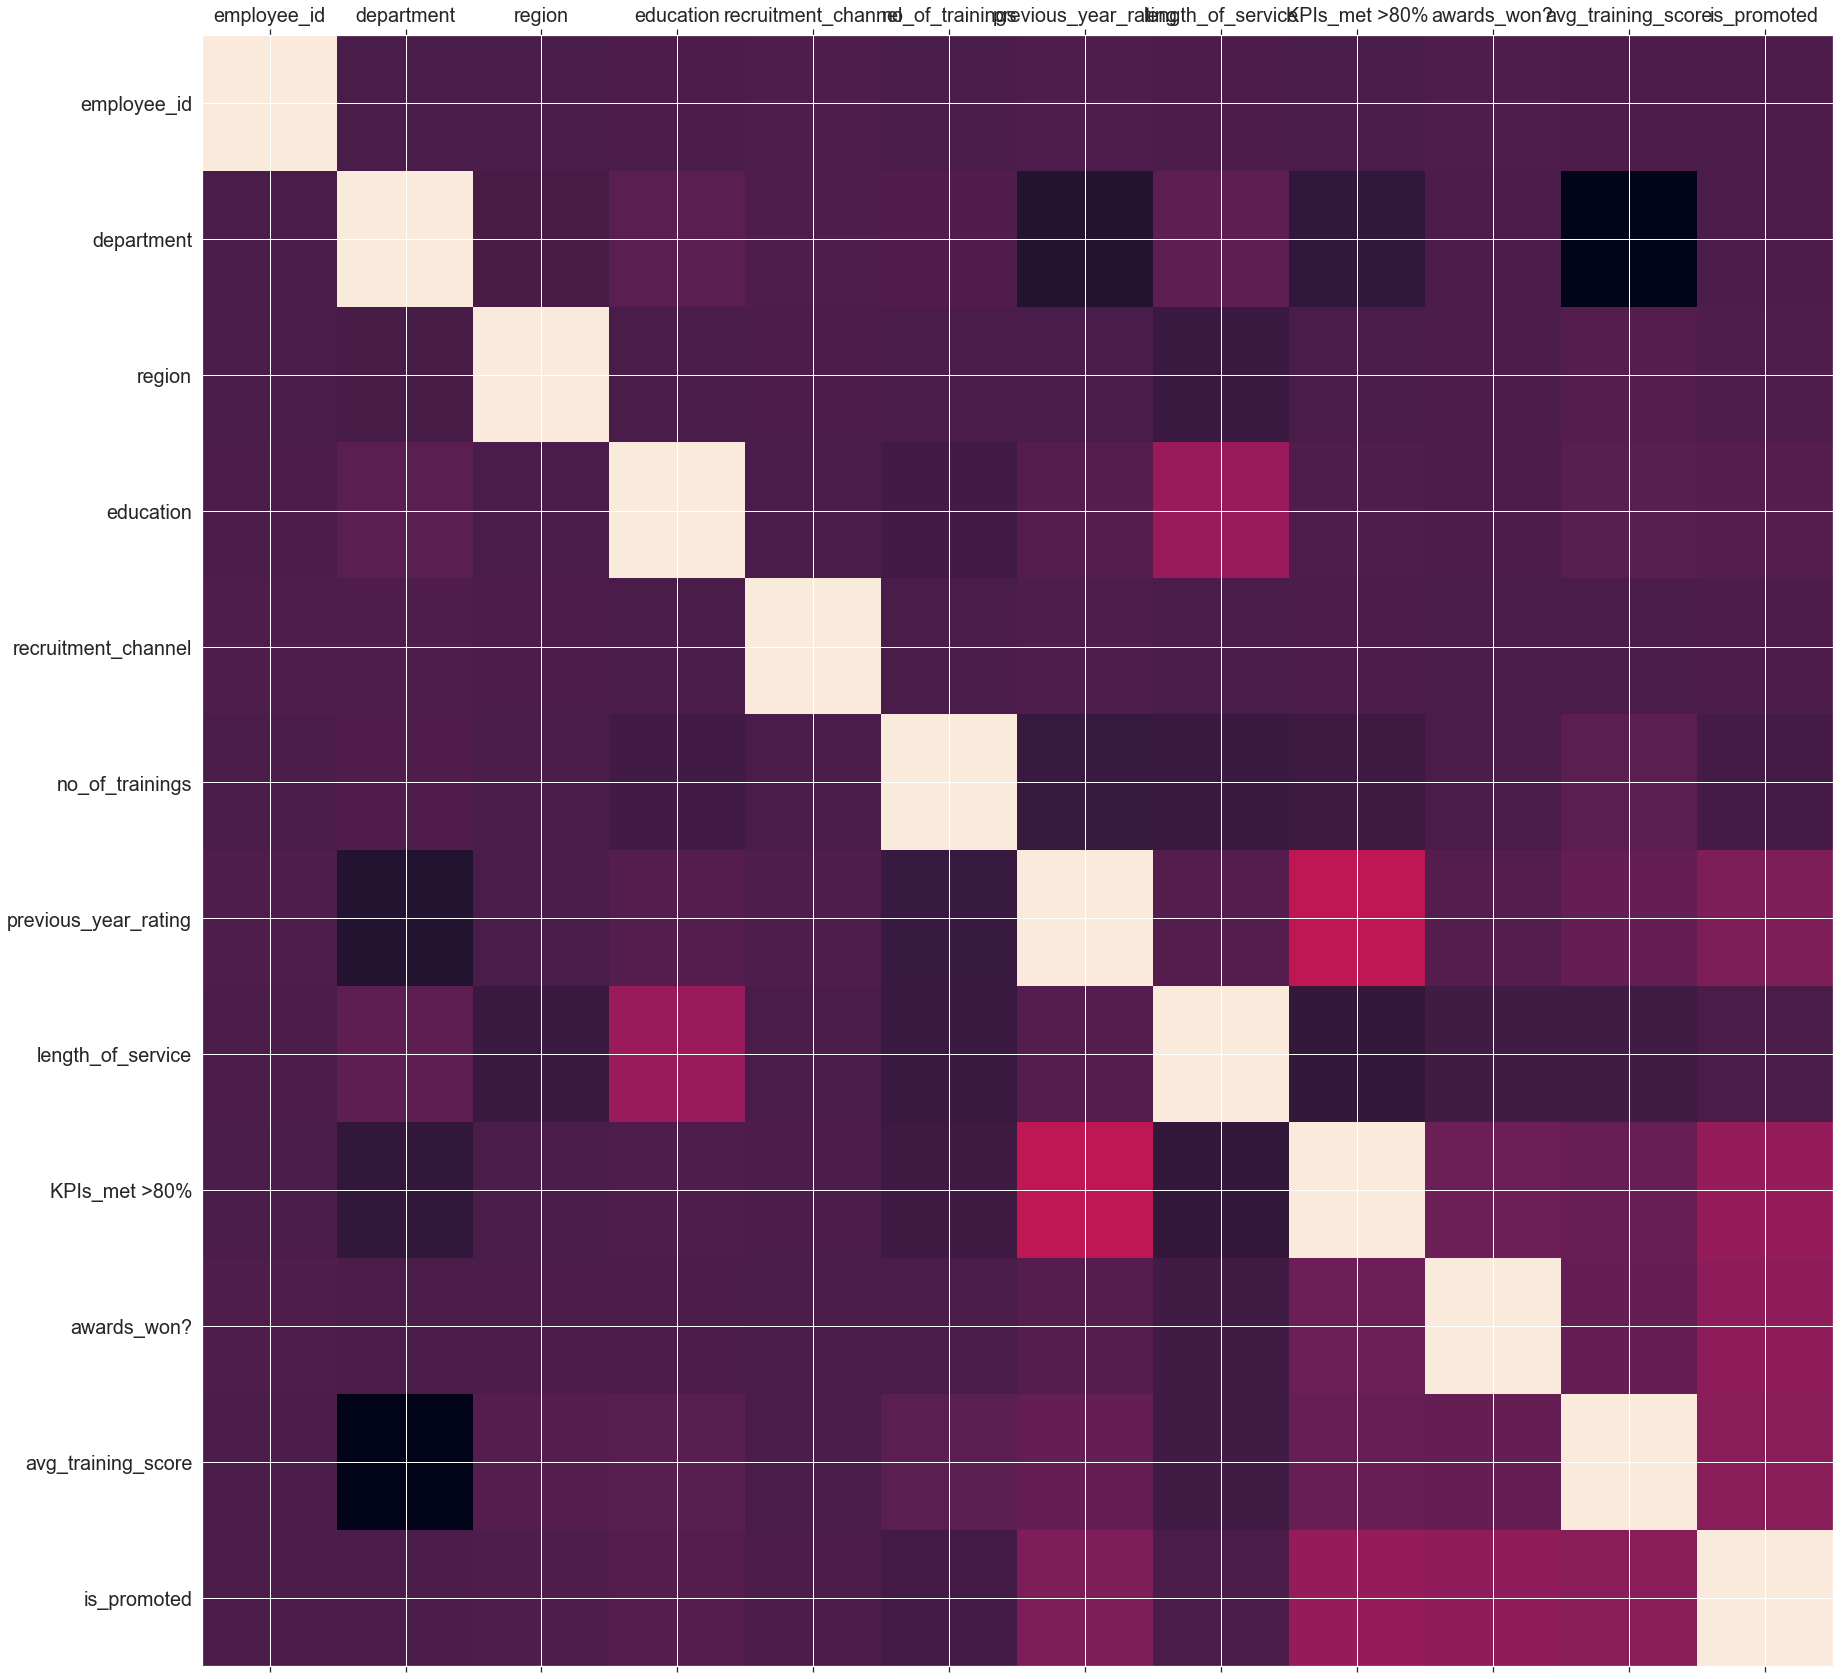

In [22]:
plot_correlation(train_set)

In [23]:
train_set.corr()

,employee_id,department,region,education,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005187,-0.003423,0.002124,0.005960,-0.005121,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
department,-0.005187,1.000000,-0.020592,0.043441,0.004732,0.014152,-0.135561,0.059060,-0.088209,-0.002151,-0.251626,0.000130
region,-0.003423,-0.020592,1.000000,-0.003815,-0.000920,-0.004590,-0.005977,-0.058939,-0.007664,0.000307,0.023572,0.008841
education,0.002124,0.043441,-0.003815,1.000000,-0.003564,-0.033469,0.027393,0.233666,0.012123,-0.001409,0.032787,0.029257
recruitment_channel,0.005960,0.004732,-0.000920,-0.003564,1.000000,-0.010405,0.005731,-0.002887,-0.000297,-0.005510,-0.002416,0.002229
no_of_trainings,-0.005121,0.014152,-0.004590,-0.033469,-0.010405,1.000000,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
previous_year_rating,0.004209,-0.135561,-0.005977,0.027393,0.005731,-0.061564,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,0.059060,-0.058939,0.233666,-0.002887,-0.057275,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.088209,-0.007664,0.012123,-0.000297,-0.045576,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.002151,0.000307,-0.001409,-0.005510,-0.007628,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871


In [24]:
# split train_data into training and validation
train_data, validation_data = train_test_split(train_set,  train_size=0.75, random_state=0)
print(train_data.shape)
print(validation_data.shape)

(41106, 12)
(13702, 12)


In [25]:
### model prediction 
#convert the dataset into LGBM format in this fromat:
# lgb.Dataset(data, label=label, feature_name=['c1', 'c2', 'c3'], categorical_feature=['c3'])
y = 'is_promoted'
x = ['department','education', 'no_of_trainings', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
categorical = ['department','education', 'no_of_trainings', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']

l_train = lgb.Dataset(train_data[x].values, 
                    label=train_data[y].values, 
                    feature_name=x,
                    categorical_feature=categorical
                        )

l_validation = lgb.Dataset(validation_data[x].values, 
                    label=validation_data[y].values, 
                    feature_name=x,
                    categorical_feature=categorical
                        )

In [26]:
parameters = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric':'auc',
    'learning_rate': 0.5,
    'num_leaves': 150,
    'max_depth':2,  
    'min_data_in_leaf': 500,
    'min_sum_hessian_in_leaf': 50,
    'min_child_samples': 100,
    'max_bin': 75,  
    'subsample': 0.9,  
    'subsample_freq': 3,
    'colsample_bytree': 0.9,  
    'min_child_weight': 0,  
    'min_split_gain': 1,
    'min_gain_to_split': 1,
    'reg_alpha': 0, 
    'reg_lambda': 0,
}

In [27]:
# train the model
model = lgb.train(parameters,
                  l_train,
                  valid_sets=[l_train, l_validation],
                  valid_names=['train','valid'],
                  early_stopping_rounds=100,
                  num_boost_round=1000,
                  verbose_eval=50,)

Training until validation scores don't improve for 100 rounds.


/Users/rose/anaconda3/envs/wns/lib/python3.6/site-packages/lightgbm/basic.py:1040: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/Users/rose/anaconda3/envs/wns/lib/python3.6/site-packages/lightgbm/basic.py:685: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


[50]	train's auc: 0.906761	valid's auc: 0.894882
[100]	train's auc: 0.91317	valid's auc: 0.895377
[150]	train's auc: 0.916688	valid's auc: 0.895083
Early stopping, best iteration is:
[76]	train's auc: 0.910562	valid's auc: 0.897269


In [28]:
test_set = test_set.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [29]:
# department
test_set["department"] = le.fit_transform(test_set["department"])

# education
test_set["education"] = le.fit_transform(test_set["education"])

# recruitment_channel
test_set["recruitment_channel"] = le.fit_transform(test_set["recruitment_channel"])
# region
test_set["region"] = le.fit_transform(test_set["region"])


In [30]:
test_set = test_set.drop(["gender", "age"], axis=1)

In [31]:
# predict on test data

test_pred = pd.DataFrame()
test_pred['employee_id'] = test_set['employee_id'].astype('int')

test_pred['is_promoted'] = model.predict(test_set[x])
test_pred.to_csv('submission.csv', index=False)


In [32]:
# use random forest
# spliting the data
X = train_set.iloc[:, 1:-1].values # features
y = train_set.iloc[:, -1].values # labels

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=2)

In [34]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=2)

# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 6, 8, 10, 12, 16], "n_estimators": [50, 200, 400, 700, 1000]}

# gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

# gs = gs.fit(X_train, y_train)

# print(gs.best_score_)
# print(gs.best_params_)


In [35]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=12,
                             min_samples_leaf=2,
                             max_features='auto',
                             oob_score=True,
                             random_state=2,)

classifier.fit(X_train, y_train)
print ('Accuracy of Random forest classifier on training set: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Accuracy of Random forest classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of Random forest classifier on training set: 0.94
Accuracy of Random forest classifier on test set: 0.94


In [36]:
predictions = classifier.predict(test_set.iloc[:, 1:])

In [37]:
# predict on test data

test_pred = pd.DataFrame()
test_pred['employee_id'] = test_set['employee_id'].astype('int')

test_pred['is_promoted'] = predictions
test_pred.to_csv('submission_rf.csv', index=False)

In [38]:
### using catboost
import catboost as cb
model = cb.CatBoostClassifier(n_estimators=1000, max_depth = 5, random_state=7, scale_pos_weight=3, thread_count=2)
model.fit(X_train, y_train)

y_pred = model.predict(test_set.iloc[:, 1:])

Learning rate set to 0.045023
0:	learn: 0.6497978	total: 104ms	remaining: 1m 43s
1:	learn: 0.6249763	total: 138ms	remaining: 1m 8s
2:	learn: 0.6015293	total: 183ms	remaining: 1m
3:	learn: 0.5733770	total: 245ms	remaining: 1m
4:	learn: 0.5543292	total: 290ms	remaining: 57.8s
5:	learn: 0.5358025	total: 328ms	remaining: 54.3s
6:	learn: 0.5202383	total: 370ms	remaining: 52.5s
7:	learn: 0.5085180	total: 431ms	remaining: 53.4s
8:	learn: 0.4961524	total: 468ms	remaining: 51.6s
9:	learn: 0.4836250	total: 517ms	remaining: 51.2s
10:	learn: 0.4725657	total: 562ms	remaining: 50.5s
11:	learn: 0.4647574	total: 601ms	remaining: 49.5s
12:	learn: 0.4569034	total: 683ms	remaining: 51.9s
13:	learn: 0.4510379	total: 729ms	remaining: 51.3s
14:	learn: 0.4399031	total: 781ms	remaining: 51.3s
15:	learn: 0.4324867	total: 819ms	remaining: 50.3s
16:	learn: 0.4267180	total: 857ms	remaining: 49.6s
17:	learn: 0.4226238	total: 905ms	remaining: 49.4s
18:	learn: 0.4204069	total: 952ms	remaining: 49.2s
19:	learn: 0.416

162:	learn: 0.2969223	total: 8.52s	remaining: 43.7s
163:	learn: 0.2968854	total: 8.55s	remaining: 43.6s
164:	learn: 0.2968507	total: 8.59s	remaining: 43.5s
165:	learn: 0.2968320	total: 8.63s	remaining: 43.4s
166:	learn: 0.2967896	total: 8.66s	remaining: 43.2s
167:	learn: 0.2967761	total: 8.7s	remaining: 43.1s
168:	learn: 0.2967084	total: 8.74s	remaining: 43s
169:	learn: 0.2964700	total: 8.78s	remaining: 42.8s
170:	learn: 0.2964637	total: 8.82s	remaining: 42.7s
171:	learn: 0.2960559	total: 8.86s	remaining: 42.6s
172:	learn: 0.2959804	total: 8.89s	remaining: 42.5s
173:	learn: 0.2959487	total: 8.93s	remaining: 42.4s
174:	learn: 0.2953616	total: 8.98s	remaining: 42.3s
175:	learn: 0.2953610	total: 9.02s	remaining: 42.2s
176:	learn: 0.2953315	total: 9.06s	remaining: 42.1s
177:	learn: 0.2953214	total: 9.12s	remaining: 42.1s
178:	learn: 0.2953190	total: 9.18s	remaining: 42.1s
179:	learn: 0.2953119	total: 9.28s	remaining: 42.3s
180:	learn: 0.2953071	total: 9.32s	remaining: 42.2s
181:	learn: 0.2

322:	learn: 0.2826033	total: 17.5s	remaining: 36.8s
323:	learn: 0.2825303	total: 17.6s	remaining: 36.7s
324:	learn: 0.2824980	total: 17.7s	remaining: 36.7s
325:	learn: 0.2822178	total: 17.7s	remaining: 36.7s
326:	learn: 0.2821515	total: 17.9s	remaining: 36.8s
327:	learn: 0.2820097	total: 18s	remaining: 36.8s
328:	learn: 0.2820096	total: 18s	remaining: 36.7s
329:	learn: 0.2820096	total: 18.1s	remaining: 36.7s
330:	learn: 0.2819665	total: 18.1s	remaining: 36.6s
331:	learn: 0.2819453	total: 18.2s	remaining: 36.5s
332:	learn: 0.2819451	total: 18.2s	remaining: 36.4s
333:	learn: 0.2819014	total: 18.2s	remaining: 36.4s
334:	learn: 0.2819014	total: 18.3s	remaining: 36.3s
335:	learn: 0.2819009	total: 18.3s	remaining: 36.2s
336:	learn: 0.2818585	total: 18.4s	remaining: 36.1s
337:	learn: 0.2817964	total: 18.4s	remaining: 36.1s
338:	learn: 0.2817787	total: 18.5s	remaining: 36.1s
339:	learn: 0.2817660	total: 18.6s	remaining: 36s
340:	learn: 0.2816993	total: 18.6s	remaining: 36s
341:	learn: 0.281699

483:	learn: 0.2768279	total: 26s	remaining: 27.7s
484:	learn: 0.2767884	total: 26s	remaining: 27.6s
485:	learn: 0.2767362	total: 26s	remaining: 27.5s
486:	learn: 0.2767362	total: 26.1s	remaining: 27.5s
487:	learn: 0.2765638	total: 26.1s	remaining: 27.4s
488:	learn: 0.2765638	total: 26.2s	remaining: 27.4s
489:	learn: 0.2765586	total: 26.3s	remaining: 27.3s
490:	learn: 0.2765417	total: 26.3s	remaining: 27.3s
491:	learn: 0.2764878	total: 26.4s	remaining: 27.2s
492:	learn: 0.2764875	total: 26.4s	remaining: 27.2s
493:	learn: 0.2764633	total: 26.4s	remaining: 27.1s
494:	learn: 0.2764632	total: 26.5s	remaining: 27s
495:	learn: 0.2764587	total: 26.5s	remaining: 27s
496:	learn: 0.2764024	total: 26.6s	remaining: 26.9s
497:	learn: 0.2763794	total: 26.6s	remaining: 26.8s
498:	learn: 0.2763675	total: 26.7s	remaining: 26.8s
499:	learn: 0.2761544	total: 26.7s	remaining: 26.7s
500:	learn: 0.2761453	total: 26.8s	remaining: 26.6s
501:	learn: 0.2761451	total: 26.9s	remaining: 26.7s
502:	learn: 0.2761148	

643:	learn: 0.2738711	total: 36s	remaining: 19.9s
644:	learn: 0.2738709	total: 36.1s	remaining: 19.8s
645:	learn: 0.2738709	total: 36.1s	remaining: 19.8s
646:	learn: 0.2738709	total: 36.1s	remaining: 19.7s
647:	learn: 0.2738709	total: 36.2s	remaining: 19.7s
648:	learn: 0.2738709	total: 36.2s	remaining: 19.6s
649:	learn: 0.2738567	total: 36.3s	remaining: 19.5s
650:	learn: 0.2738431	total: 36.3s	remaining: 19.5s
651:	learn: 0.2738431	total: 36.4s	remaining: 19.4s
652:	learn: 0.2738430	total: 36.4s	remaining: 19.4s
653:	learn: 0.2738421	total: 36.5s	remaining: 19.3s
654:	learn: 0.2738418	total: 36.5s	remaining: 19.2s
655:	learn: 0.2738418	total: 36.5s	remaining: 19.2s
656:	learn: 0.2738410	total: 36.6s	remaining: 19.1s
657:	learn: 0.2738392	total: 36.6s	remaining: 19s
658:	learn: 0.2738390	total: 36.7s	remaining: 19s
659:	learn: 0.2738363	total: 36.7s	remaining: 18.9s
660:	learn: 0.2738362	total: 36.8s	remaining: 18.8s
661:	learn: 0.2738362	total: 36.8s	remaining: 18.8s
662:	learn: 0.2738

805:	learn: 0.2722047	total: 45.3s	remaining: 10.9s
806:	learn: 0.2722020	total: 45.3s	remaining: 10.8s
807:	learn: 0.2722019	total: 45.4s	remaining: 10.8s
808:	learn: 0.2722002	total: 45.5s	remaining: 10.7s
809:	learn: 0.2721764	total: 45.5s	remaining: 10.7s
810:	learn: 0.2721762	total: 45.5s	remaining: 10.6s
811:	learn: 0.2721762	total: 45.6s	remaining: 10.6s
812:	learn: 0.2721556	total: 45.6s	remaining: 10.5s
813:	learn: 0.2721555	total: 45.7s	remaining: 10.4s
814:	learn: 0.2721555	total: 45.7s	remaining: 10.4s
815:	learn: 0.2721555	total: 45.8s	remaining: 10.3s
816:	learn: 0.2721338	total: 45.8s	remaining: 10.3s
817:	learn: 0.2720207	total: 45.9s	remaining: 10.2s
818:	learn: 0.2719697	total: 45.9s	remaining: 10.1s
819:	learn: 0.2719292	total: 46s	remaining: 10.1s
820:	learn: 0.2719265	total: 46s	remaining: 10s
821:	learn: 0.2719263	total: 46.1s	remaining: 9.97s
822:	learn: 0.2718808	total: 46.1s	remaining: 9.91s
823:	learn: 0.2718806	total: 46.1s	remaining: 9.86s
824:	learn: 0.2718

964:	learn: 0.2703662	total: 54.1s	remaining: 1.96s
965:	learn: 0.2703661	total: 54.1s	remaining: 1.91s
966:	learn: 0.2703656	total: 54.2s	remaining: 1.85s
967:	learn: 0.2703653	total: 54.2s	remaining: 1.79s
968:	learn: 0.2703653	total: 54.2s	remaining: 1.74s
969:	learn: 0.2703643	total: 54.3s	remaining: 1.68s
970:	learn: 0.2703641	total: 54.3s	remaining: 1.62s
971:	learn: 0.2703491	total: 54.4s	remaining: 1.57s
972:	learn: 0.2703489	total: 54.4s	remaining: 1.51s
973:	learn: 0.2703487	total: 54.5s	remaining: 1.45s
974:	learn: 0.2703487	total: 54.5s	remaining: 1.4s
975:	learn: 0.2703485	total: 54.6s	remaining: 1.34s
976:	learn: 0.2703485	total: 54.6s	remaining: 1.28s
977:	learn: 0.2703483	total: 54.6s	remaining: 1.23s
978:	learn: 0.2703479	total: 54.7s	remaining: 1.17s
979:	learn: 0.2703476	total: 54.7s	remaining: 1.12s
980:	learn: 0.2703474	total: 54.8s	remaining: 1.06s
981:	learn: 0.2703473	total: 54.8s	remaining: 1s
982:	learn: 0.2703454	total: 54.9s	remaining: 949ms
983:	learn: 0.27

In [39]:
import sys
sys.executable

'/Users/rose/anaconda3/envs/wns/bin/python'

In [40]:
test_pred = pd.DataFrame()
test_pred['employee_id'] = test_set['employee_id'].astype('int')

test_pred['is_promoted'] = y_pred
test_pred.to_csv('submission_cb.csv', index=False)